In [1]:
import NotebookImport
from DX_by_cancer_short import *

importing IPython notebook from DX_by_cancer_short

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from Setup/DX_Imports

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../DX/Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


importing IPython notebook from Immune_Stroma_Scoring

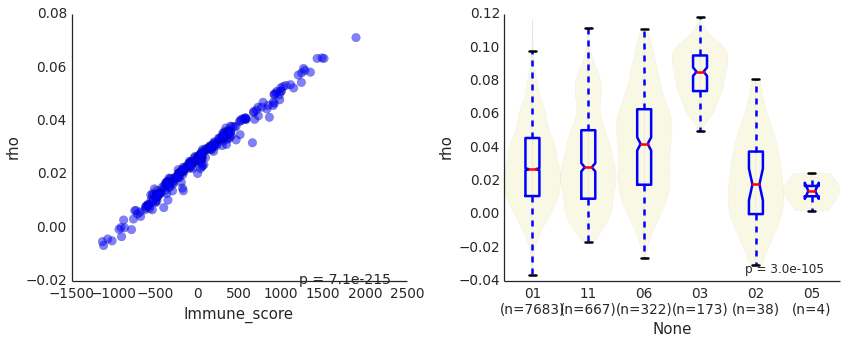

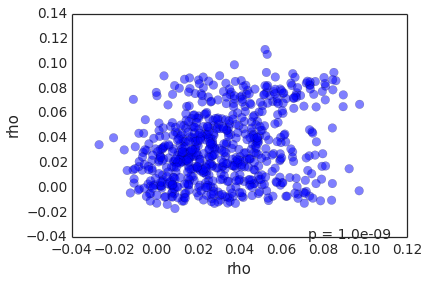

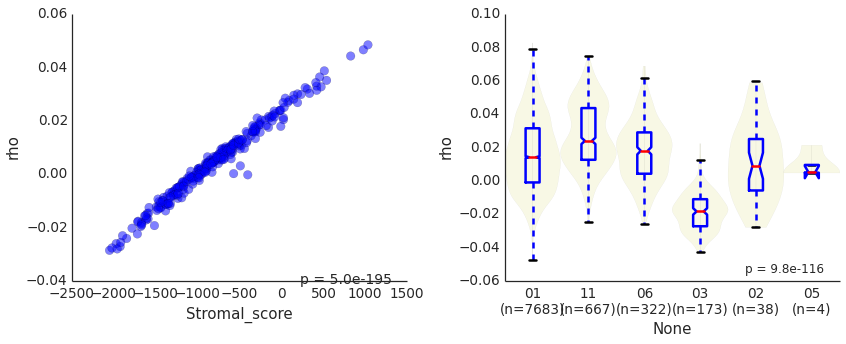

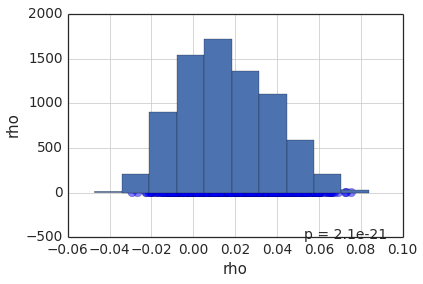

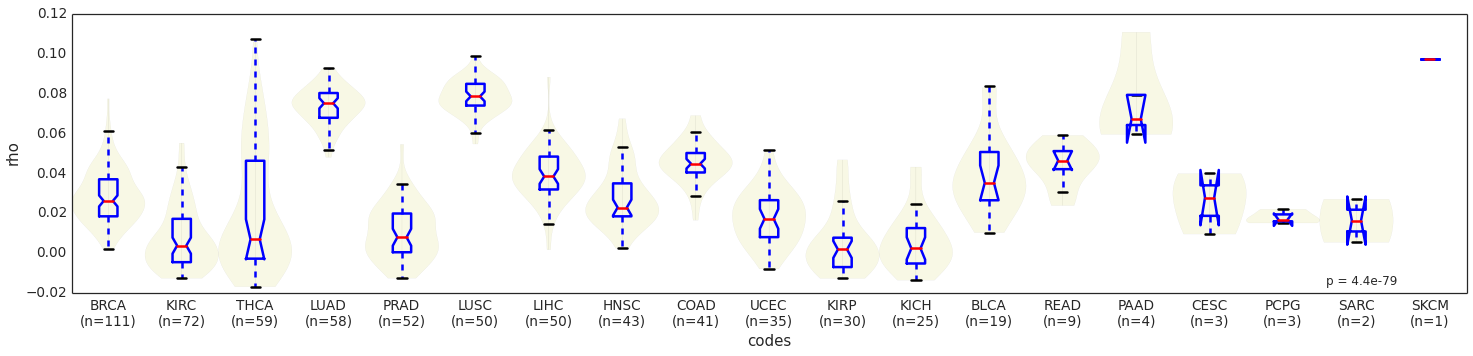

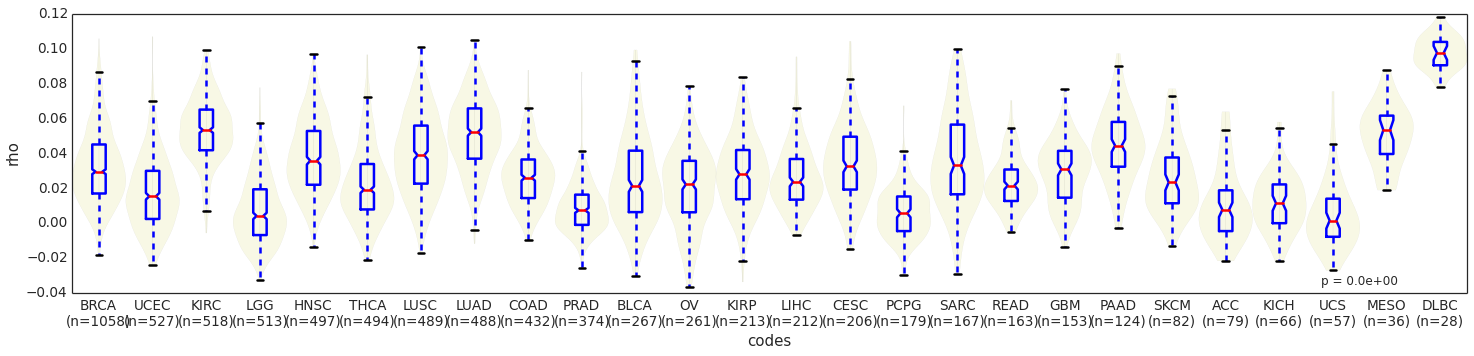

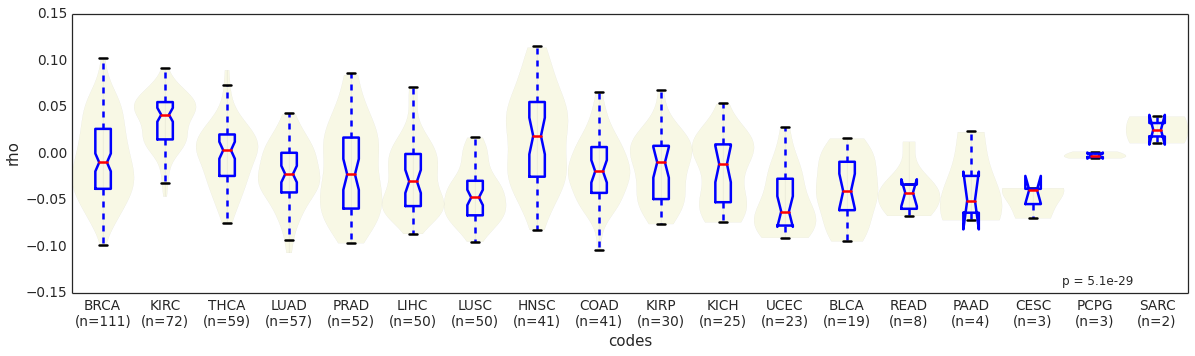

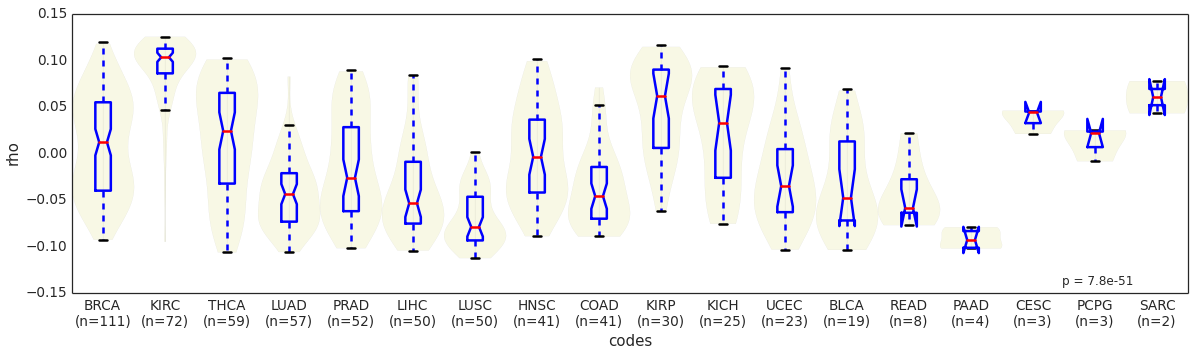

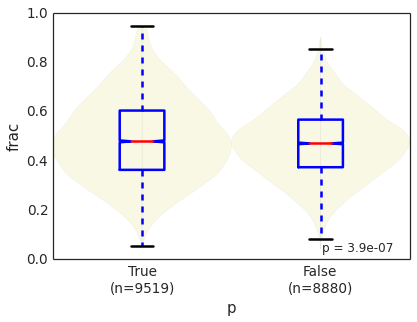

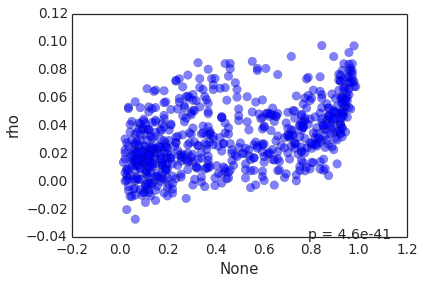

In [3]:
from Immune_Stroma_Scoring import *

In [4]:
vc = codes.ix[matched_rna.columns.get_level_values(0).unique()].value_counts()
vc.sum()

650

In [8]:
cancers = ti(vc > 40)

In [9]:
pd.DataFrame({c: spearman_pandas(rr.p, t_h[c] - t_m[c]) for c in cancers}).T.sort('p')

,rho,p
LUSC,0.12,1.42e-58
KIRC,-0.10,2.45e-43
LIHC,0.05,1.33e-12
COAD,0.05,1.42e-10
LUAD,0.04,1.51e-07
BRCA,-0.03,2.40e-05
HNSC,-0.03,2.64e-05
PRAD,-0.03,1.68e-04
THCA,0.03,4.64e-04


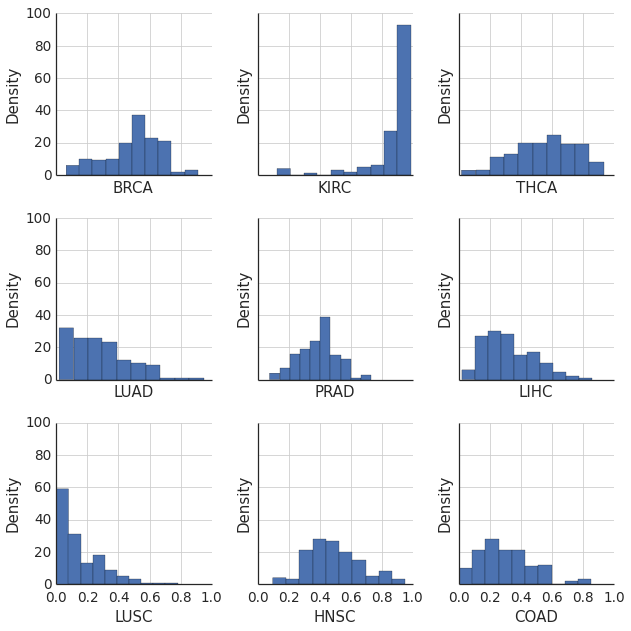

In [10]:
#Do not import
fig, axs = subplots(3,3, figsize=(9,9), sharex=True, sharey=True)
axs = axs.flatten()
for i,c in enumerate(cancers):
    ax = axs[i]
    s1, s2 = match_series(t_h[c].dropna(), t_m[c].dropna())
    s1.ix[ti(immune>0)].hist(bins=10, ax=ax)
    ax.set_xlabel(c)
    ax.set_ylabel('Density');
sns.despine(fig)
fig.tight_layout()

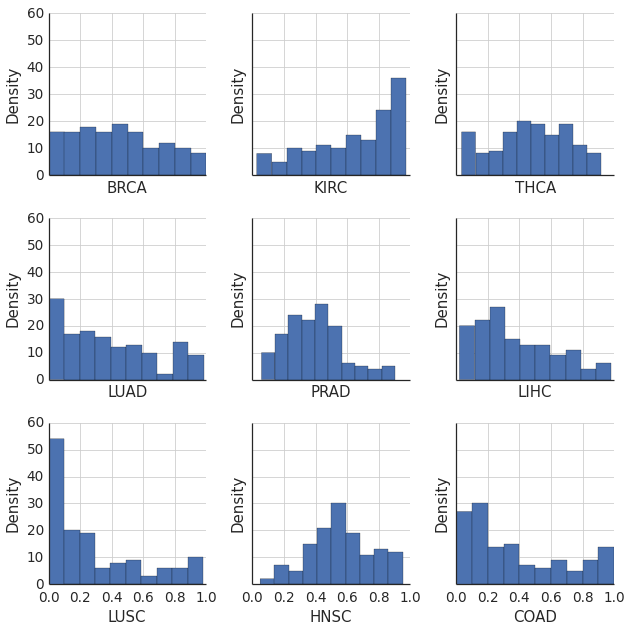

In [11]:
#Do not import
fig, axs = subplots(3,3, figsize=(9,9), sharex=True, sharey=True)
axs = axs.flatten()
for i,c in enumerate(cancers):
    ax = axs[i]
    s1, s2 = match_series(t_h[c].dropna(), t_m[c].dropna())
    s1.ix[ti(stromal>0)].hist(bins=10, ax=ax)
    ax.set_xlabel(c)
    ax.set_ylabel('Density');
sns.despine(fig)
fig.tight_layout()

In [14]:
m2 = matched_tn.ix[:, ti(immune_score_dx > 0)]

dx2 = {c: dx_group(codes==c, m2) for c in cancers}
dx2 = pd.concat(dx2, axis=1)
dx2 = dx2.ix[dx_rna.index]

/cellar/users/agross/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:79: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [ ]:
t_m2 = dx2.xs(('miss','frac'), axis=1, level=[1,2])
t_h2 = dx2.xs(('hit','frac'), axis=1, level=[1,2])
num_dx2 = dx2.xs(('hit','num_dx'), axis=1, level=[1,2])
t_m2 = t_m2.mask(num_dx < 30)